# <font color=blue>Ri</font><font color=green>cky</font> <font color=Red>Var</font><font color=purple>gas</font><br>Homework 4<br>
***
***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing 

#### Here We import the data and set it into a data frame

In [15]:
df =  pd.read_csv('Cancer.csv')

In [16]:
df[:10]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


#### Here we want to seperate the data in order to get it ready to split by saving the feature names

In [17]:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

#### Now we save only the features into X

In [18]:
X = df[feature_cols]

#### We want to save the results into y 

In [19]:
y=df["Malignant_Cancer"]

#### Here we finally use the data to split it into testing and training sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=3)

#### We now use the training and testing set to train the data using a decision tree and testing to see how accurate it is

In [21]:
my_decisiontree = DecisionTreeClassifier(random_state=3)
my_decisiontree.fit(X_train, y_train)
y_predict_decision_tree = my_decisiontree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_predict_decision_tree)
print(accuracy_decision_tree)

0.8301886792452831


#### Here we want to loop 19 times and everytime generate different results and save them to an array this is known as bagging

In [22]:
answers = []
for i in range(19):
    bootstarp_size = (int)(0.8*df.shape[0])
    Xtrain,ytrain = resample(X_train, y_train, n_samples = bootstarp_size , random_state= i, replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=3)
    my_decisiontree.fit(Xtrain,ytrain)
    y_predict_decision_tree = my_decisiontree.predict(X_test)
    answers.append(y_predict_decision_tree)

#### Now that bagging is complete we now want to do voting and we achieve this by going through all of the columns and deciding what should be put for the final voting array. 

In [23]:
votingArray = []
for i in range(53):
    zeros = 0
    ones=0;
    for x in range(19):
        number =answers[x][i] ## This takes in the first place increasing until the end
        if(number == 0):
            zeros +=1
        else:
            ones +=1
    if(zeros>ones):
        votingArray.append(0)
    else:
        votingArray.append(1)
        
            

#### Now that we have our voting array done the array would now want to check the accuracy and print it out

In [24]:
print(votingArray)
accuracy_decision_tree = accuracy_score(y_test, votingArray)
print(accuracy_decision_tree)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
0.8867924528301887


#### Here we want to use the RandomForest to figure out how accurate it is and we can see that it has more accruracy than what the results of bagging and voting was

In [25]:
my_RandomForest = RandomForestClassifier(n_estimators =19, bootstrap=True, random_state =3)
my_RandomForest.fit(X_train,y_train)
y_predict_Random_Forest = my_RandomForest.predict(X_test)
accuracy_RandomForest= accuracy_score(y_test,y_predict_Random_Forest )
print(accuracy_RandomForest)

0.9245283018867925


# Question 2

#### Here we read the Data from Hearts_Short and save that into hs_df as a data frame

In [26]:
hs_df =  pd.read_csv('Heart_short.csv')

#### Here we set the feature cols into feature cols 

In [27]:
feature_cols = ["Age","RestBP","Chol","RestECG","MaxHR","Oldpeak"]

In [28]:
hs_df[:10]

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No
5,56,120,236,0,178,0.8,No
6,62,140,268,2,160,3.6,Yes
7,57,120,354,0,163,0.6,No
8,63,130,254,2,147,1.4,Yes
9,53,140,203,2,155,3.1,Yes


#### We set all of the features to X

In [29]:
X = hs_df[feature_cols]

#### We set the results to y

In [30]:
y = hs_df["AHD"]

#### Now we want to normalize the X 

In [31]:
X = preprocessing.scale(X) 

#### Now we want to split the data into training and testing 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=3)

#### Here we use logistic regression to train and test the data and we then see what the accuracy was

In [33]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_logred = my_logreg.predict(X_test)
accuracy_logred = accuracy_score(y_test,y_predict_logred)
print(accuracy_logred)

0.7183098591549296


#### Here we want to ise the logistic regression to return a prediction and then we use this prediction 
#### to calculate our fpr tpt and this will allow us to calculate our AUC using the AUC we now want to 
#### produce our plot and we then display the plot. We also set the labels and the colors here.  

[0.         0.02439024 0.02439024 0.04878049 0.04878049 0.09756098
 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146 0.2195122
 0.2195122  0.29268293 0.29268293 0.3902439  0.3902439  0.41463415
 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561 0.68292683
 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732 1.        ]
[0.03333333 0.03333333 0.33333333 0.33333333 0.36666667 0.36666667
 0.4        0.4        0.53333333 0.53333333 0.6        0.6
 0.63333333 0.63333333 0.7        0.7        0.73333333 0.73333333
 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667 0.86666667
 0.93333333 0.93333333 0.96666667 0.96666667 1.         1.        ]
0.7650406504065042


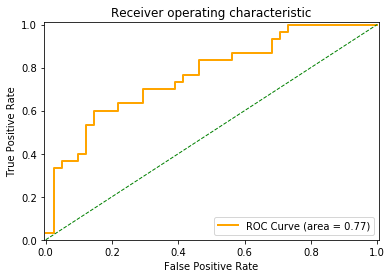

In [34]:
Prediction = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Prediction[:,1], pos_label="Yes")
AUC = metrics.auc(fpr, tpr)
print(fpr)
print(tpr)
print(AUC)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()
